In [8]:
import os
import pydicom as dicom
import tensorflow as tf
import numpy as npb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.utils import image_dataset_from_directory

# Loading images

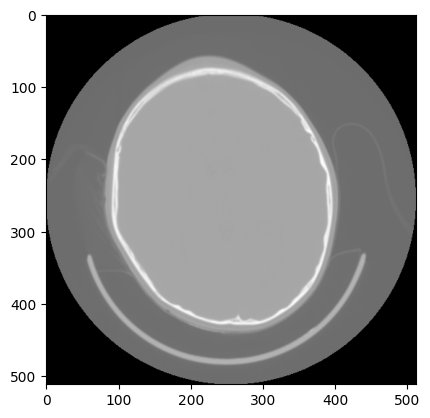

In [11]:
#specify your image path
image_path = '/Users/juliaojedaalonso/code/JuliaOjedaAlonso/hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/ID_0a0a2d124.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array, cmap = 'gray');

In [4]:
ds.pixel_array

array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       ...,
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000]], dtype=int16)

# Dataset for tensorflow

In [12]:
batch_size = 32

In [ ]:
#Training data location
train_ds = image_dataset_from_directory(
    train_data_dir,
    labels='labes',
    label_mode='int',
    seed='None',
    image_size=(512,512),
    batch_size=batch_size)

# Test data location
val_ds = image_dataset_from_directory(
    test_data_dir,
    labels='labels',
    label_mode='int',
    seed='None',
    image_size=(512,512),
    batch_size=batch_size)


In [ ]:
class_names = train_ds.class_names
print(class_names)

In [56]:
# Location of our data in 2 variables to re use later
train_data_dir = 'hem_detection_labels/training_set/'
test_data_dir = 'hem_detection_labels/test_set/'

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(f"{train_data_dir}.dcm")
x = img_to_array(img)/255  # We divide the pixel value by 255 to end up between 0 and 1

# Preprocessing

# Windowing and normalization - Brain tissue

In [ ]:
# Step 1: Windowing for brain tissue
window_center = 40
window_width = 120
min_val = window_center - (window_width / 2)
max_val = window_center + (window_width / 2)
windowed_image_brain = np.clip(ds.pixel_array, min_val, max_val)

# Step 2: Normalize
normalized_image_brain = (windowed_image_brain - min_val) / (max_val - min_val)

In [ ]:
plt.imshow(normalized_image_brain, cmap='gray')

In [ ]:
normalized_image_brain.shape

# Architecture

In [28]:
# Intialize the Sequential model --> Linear stack of layers
model = Sequential()

# Data Augmentation Layers

model.add(layers.RandomFlip("horizontal"))
model.add(layers.RandomZoom(0.1))
model.add(layers.RandomTranslation(0.2, 0.2))
model.add(layers.RandomRotation(0.1))


# Add Convolutional Layer
model.add(Conv2D(32,(5,5),activation='relu', input_shape=(512,512,1)))

# Add Pooling Layer --> MaxPooling for down-sampling while retaining dominant features
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another Convolutional Layer
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another Convolutional Layer
model.add(Conv2D(128,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another Convolutional Layer
model.add(Conv2D(256,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# Flatten the feature maps to feed into Dense layers
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512, activation='relu')) # Hidden dense layer
model.add(Dropout(0.5)) # Dropout to prevent overfitting
model.add(Dense(6, activation='softmax')) # Output layer for 6-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 508, 508, 32)      832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 254, 254, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 250, 250, 64)      51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 125, 125, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 121, 121, 128)     204928    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 60, 60, 128)     

In [4]:
MODEL = "model"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                           monitor='val_loss',
                                           verbose=0,
                                           save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       patience=3,
                                       verbose=1,
                                       min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                      patience=10,
                                      verbose=0,
                                      restore_best_weights=True)

NameError: name 'callbacks' is not defined

In [3]:
#Train the Model

history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    cal_backs=[modelCheckpoint, LRreducer, EarlyStopper]
    )

NameError: name 'model' is not defined

In [ ]:
#Plot accuracy
plot_history(history)

# Save and use the model

In [5]:
model.save('model')

NameError: name 'model' is not defined

In [6]:
from tensorflow.keras.models import load_model

model = load_model("model")

OSError: No file or directory found at model